<a href="https://colab.research.google.com/github/SairajDcoder/Liver_Disease_Predictor_toolkit/blob/main/Liver_Disease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sai3606t","key":"07f10049e8b412103bff83afeea1a8be"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!pip install kaggle


In [5]:
!kaggle datasets download uciml/indian-liver-patient-records -p /content/liver-disease --unzip

Dataset URL: https://www.kaggle.com/datasets/uciml/indian-liver-patient-records
License(s): CC0-1.0
  0% 0.00/7.68k [00:00<?, ?B/s]
100% 7.68k/7.68k [00:00<00:00, 30.6MB/s]


In [6]:
import pandas as pd
df = pd.read_csv('/content/liver-disease/indian_liver_patient.csv');

In [7]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
print(df.columns)

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')


In [9]:
df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [10]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [11]:
 import matplotlib.pyplot as plt
 import seaborn as sns

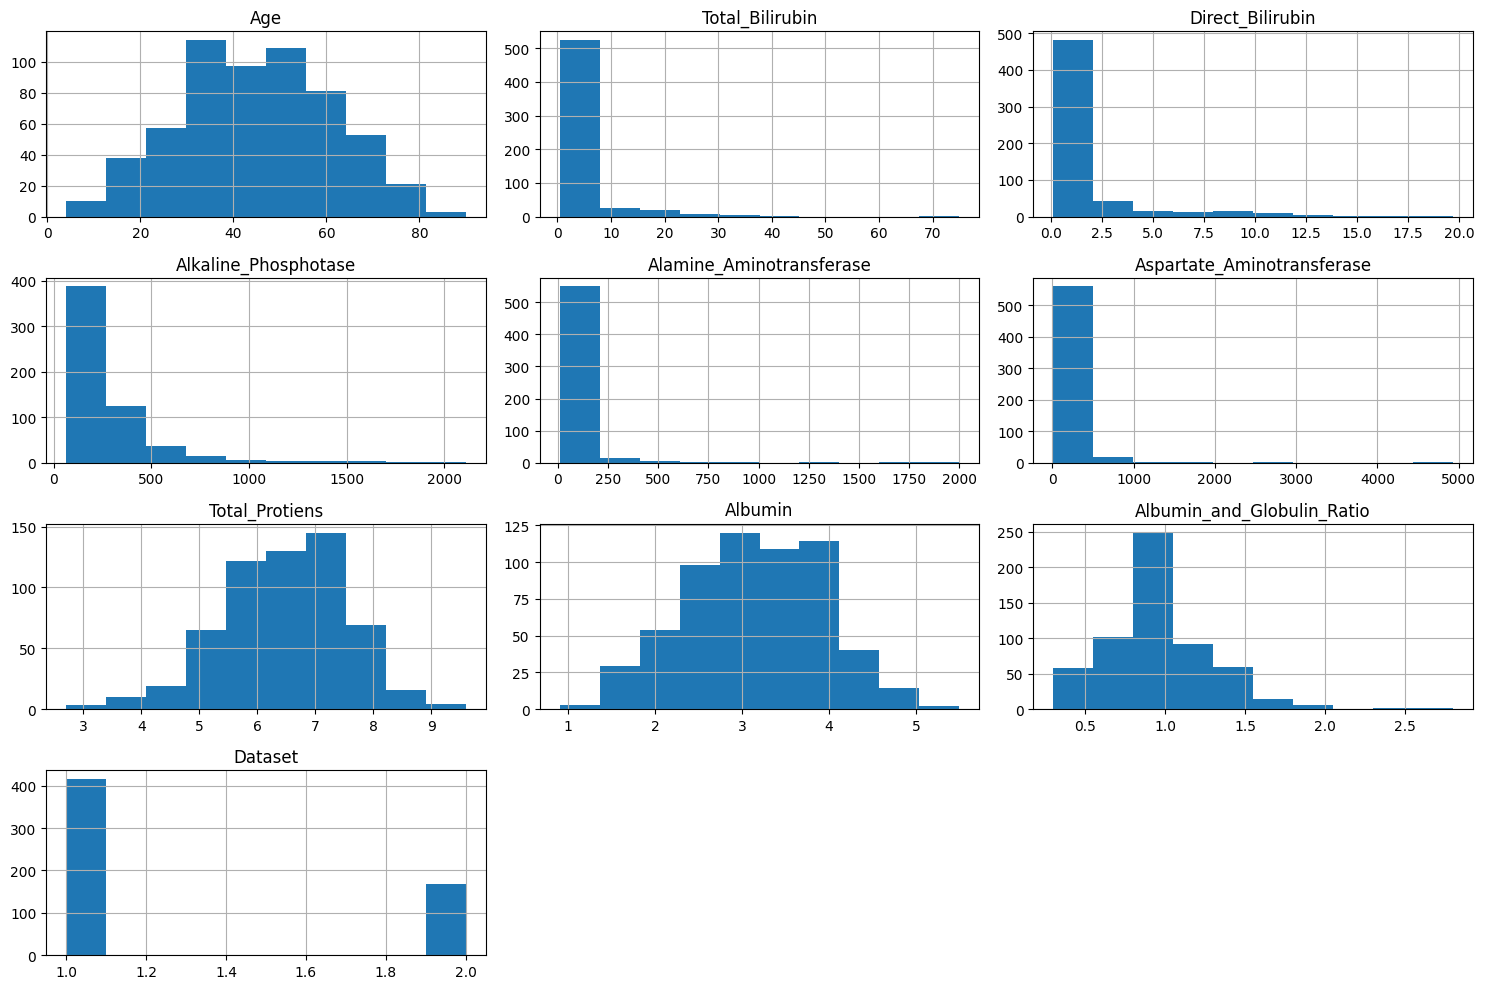

In [12]:
df[numeric_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

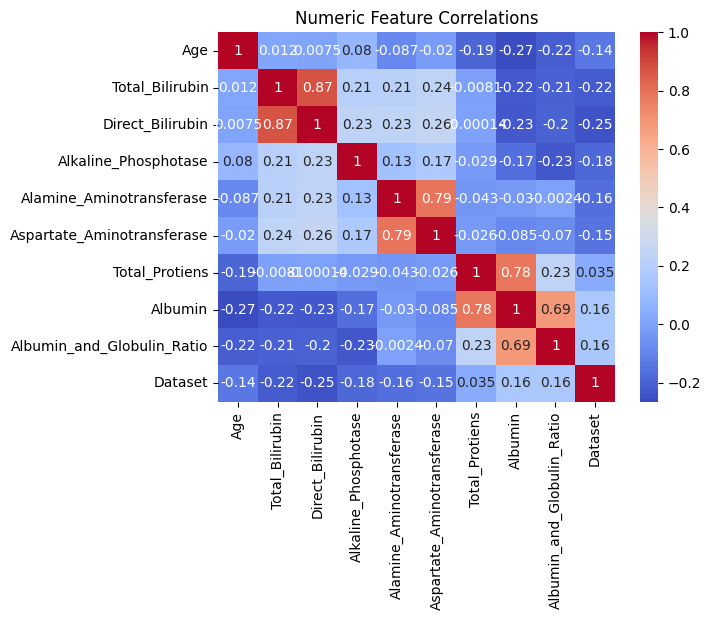

In [13]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Numeric Feature Correlations")
plt.show()

In [14]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'Dataset' in cat_cols:
  cat_cols.remove('Dataset')

In [15]:
x = df.drop('Dataset', axis=1)
y = df['Dataset'].map({1: 1, 2: 0})
print(y)


0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 583, dtype: int64


In [16]:
x = pd.get_dummies(x, columns=cat_cols)
print("Final feature columns: ", x.columns)

Final feature columns:  Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'Gender_Female', 'Gender_Male'],
      dtype='object')


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)


In [19]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)

LogisticRegression()

In [22]:
from sklearn.metrics import accuracy_score, classification_report

In [23]:
y_pred_lr = lr_model.predict(x_test_scaled)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy:  0.7692307692307693
              precision    recall  f1-score   support

           0       0.60      0.30      0.40        30
           1       0.79      0.93      0.86        87

    accuracy                           0.77       117
   macro avg       0.70      0.62      0.63       117
weighted avg       0.74      0.77      0.74       117



In [24]:
from sklearn.metrics import confusion_matrix

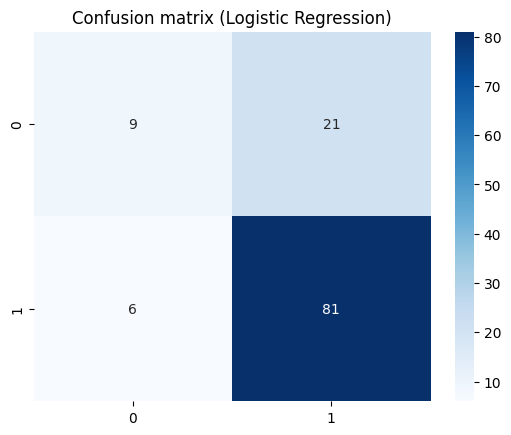

In [25]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix (Logistic Regression)')
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled, y_train)
y_pred_rf = rf_model.predict(x_test_scaled)
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy:  0.7606837606837606


In [28]:
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy:  0.7606837606837606


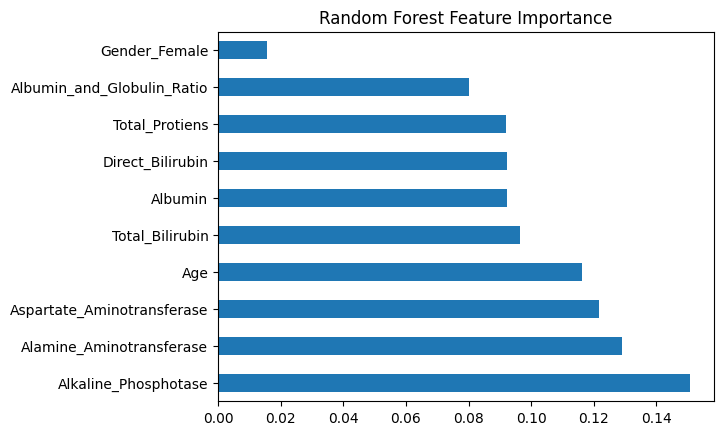

In [29]:
feat_imp = pd.Series(rf_model.feature_importances_, index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.show()

In [30]:
import joblib
joblib.dump(rf_model, 'liver_rf_model.pkl')

['liver_rf_model.pkl']

In [31]:
joblib.dump(scaler, 'liver_scaler.pkl')

['liver_scaler.pkl']

In [32]:
sample =  x.head(1)
sample.to_csv('liver_user_template.csv', index=False)
print("User Template saved as 'Liver_user_template.csv'")

User Template saved as 'Liver_user_template.csv'


In [33]:
sample_data = df.sample(n=5, random_state=42)  # random_state ensures reproducibility
sample_data.to_csv('/content/liver_dataset.csv', index=False)

print("File saved as /content/liver_dataset.csv")

File saved as /content/liver_dataset.csv


In [34]:
from google.colab import files
files.upload()

Saving liver_dataset.csv to liver_dataset (1).csv


{'liver_dataset (1).csv': b'Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset\n19,Male,1.4,0.8,178,13,26,8.0,4.6,1.3,2\n12,Male,1.0,0.2,719,157,108,7.2,3.7,1.0,1\n60,Male,5.7,2.8,214,412,850,7.3,3.2,0.78,1\n42,Female,0.5,0.1,162,155,108,8.1,4.0,0.9,1\n40,Male,14.5,6.4,358,50,75,5.7,2.1,0.5,1\n'}

In [35]:
import pandas as pd
import joblib

# Load the 5 random patients dataset
user_df = pd.read_csv('/content/liver_dataset.csv')

# Identify column types from original df
numeric_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
bool_cols = df.select_dtypes(include='bool').columns.tolist()

# Keep only columns present in user_df
numeric_cols = [col for col in numeric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]

# Fill missing values
user_df[numeric_cols] = user_df[numeric_cols].fillna(user_df[numeric_cols].mean())
for col in cat_cols:
    user_df[col] = user_df[col].fillna('Unknown')
for col in bool_cols:
    user_df[col] = user_df[col].astype(int)

# One-hot encode categorical features
user_df_encoded = pd.get_dummies(user_df, columns=cat_cols)

# Reindex to match training features (fill missing columns with 0)
user_df_encoded = user_df_encoded.reindex(columns=x.columns, fill_value=0)

# Scale numeric features using saved scaler
scaler = joblib.load('/content/liver_scaler.pkl')
user_df_scaled = scaler.transform(user_df_encoded)

# Load trained model and predict
model = joblib.load('/content/liver_rf_model.pkl')
preds = model.predict(user_df_scaled)

# Map predictions to original Dataset values: 1 = disease, 2 = healthy
user_df['Liver_Disease_Prediction'] = pd.Series(preds).map({1: 1, 0: 2})

# Show final results
print(user_df)


   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   19    Male              1.4               0.8                   178   
1   12    Male              1.0               0.2                   719   
2   60    Male              5.7               2.8                   214   
3   42  Female              0.5               0.1                   162   
4   40    Male             14.5               6.4                   358   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        13                          26             8.0   
1                       157                         108             7.2   
2                       412                         850             7.3   
3                       155                         108             8.1   
4                        50                          75             5.7   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  Liver_Disease_Prediction  
0      4.6            